### Text classification

In [2]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="michellejieli/emotion_text_classifier")
classifier("I love this!")

/root/miniconda3/envs/transformers/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
2024-02-29 10:03:19.253248: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-29 10:03:19.710938: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 10:03:19.711014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 10:03

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

[{'label': 'joy', 'score': 0.9887555241584778}]

In [3]:
classifier("I hate this!")

[{'label': 'disgust', 'score': 0.6728644371032715}]

In [4]:
classifier("what do you like？")

[{'label': 'neutral', 'score': 0.9825495481491089}]

In [5]:
classifier("yummy!")

[{'label': 'joy', 'score': 0.9711121916770935}]

In [6]:
classifier("amazing!")

[{'label': 'joy', 'score': 0.9520456790924072}]

In [7]:
classifier("Goddness!")

[{'label': 'anger', 'score': 0.6941922903060913}]

In [8]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

sentences = ["I am not having a great day"]

model_outputs = classifier(sentences)
print(model_outputs[0])
# produces a list of dicts for each of the labels

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

[{'label': 'disappointment', 'score': 0.4666956663131714}, {'label': 'sadness', 'score': 0.3984948396682739}, {'label': 'annoyance', 'score': 0.06806602329015732}, {'label': 'neutral', 'score': 0.057030197232961655}, {'label': 'disapproval', 'score': 0.044239357113838196}, {'label': 'nervousness', 'score': 0.014850745908915997}, {'label': 'realization', 'score': 0.014059904962778091}, {'label': 'approval', 'score': 0.011267448775470257}, {'label': 'joy', 'score': 0.0063033816404640675}, {'label': 'remorse', 'score': 0.006221487186849117}, {'label': 'caring', 'score': 0.0060293967835605145}, {'label': 'embarrassment', 'score': 0.005265488289296627}, {'label': 'anger', 'score': 0.00498143769800663}, {'label': 'disgust', 'score': 0.004259035456925631}, {'label': 'grief', 'score': 0.004002132453024387}, {'label': 'confusion', 'score': 0.003382924711331725}, {'label': 'relief', 'score': 0.0031404944602400064}, {'label': 'desire', 'score': 0.0028274687938392162}, {'label': 'admiration', 'sco

### Token Classification
在任何NLP任务中，文本都经过预处理，将文本序列分成单个单词或子词。这些被称为tokens。

Token Classification（Token分类）将每个token分配一个来自预定义类别集的标签。

两种常见的 Token 分类是：

命名实体识别（NER）：根据实体类别（如组织、人员、位置或日期）对token进行标记。NER在生物医学设置中特别受欢迎，可以标记基因、蛋白质和药物名称。
词性标注（POS）：根据其词性（如名词、动词或形容词）对标记进行标记。POS对于帮助翻译系统了解两个相同的单词如何在语法上不同很有用（作为名词的银行与作为动词的银行）。

In [9]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")

nlp = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/709M [00:00<?, ?B/s]

[{'entity_group': 'PER', 'score': 0.96688974, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity_group': 'LOC', 'score': 0.9996282, 'word': 'Berlin', 'start': 34, 'end': 40}]


/root/miniconda3/envs/transformers/lib/python3.11/site-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [10]:
from transformers import pipeline
nlp = pipeline('question-answering', model='lserinol/bert-turkish-question-answering', tokenizer='lserinol/bert-turkish-question-answering')
nlp({
    'question': "Ankara'da kaç ilçe vardır?",
    'context': r"""Türkiye'nin başkenti Ankara'dır. Ülkenin en büyük idari birimleri illerdir ve 81 il vardır. Bu iller ilçelere ayrılmıştır, toplamda 973 ilçe mevcuttur."""
})

config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of the model checkpoint at lserinol/bert-turkish-question-answering were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

{'score': 0.907213568687439, 'start': 132, 'end': 135, 'answer': '973'}

### Summarization
Summarization(文本摘要）从较长的文本中创建一个较短的版本，同时尽可能保留原始文档的大部分含义。摘要是一个序列到序列的任务；它输出比输入更短的文本序列。有许多长篇文档可以进行摘要，以帮助读者快速了解主要要点。法案、法律和财务文件、专利和科学论文等文档可以摘要，以节省读者的时间并作为阅读辅助工具。

与问答类似，摘要有两种类型：

提取式：从原始文本中识别和提取最重要的句子
生成式：从原始文本中生成目标摘要（可能包括输入文件中没有的新单词）；SummarizationPipeline使用生成式方法

In [11]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [12]:
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.'}]


### Audio classification
Audio classification(音频分类)是一项将音频数据从预定义的类别集合中进行标记的任务。这是一个广泛的类别，具有许多具体的应用，其中一些包括：

声学场景分类：使用场景标签（“办公室”、“海滩”、“体育场”）对音频进行标记。
声学事件检测：使用声音事件标签（“汽车喇叭声”、“鲸鱼叫声”、“玻璃破碎声”）对音频进行标记。
标记：对包含多种声音的音频进行标记（鸟鸣、会议中的说话人识别）。
音乐分类：使用流派标签（“金属”、“嘻哈”、“乡村”）对音乐进行标记。

In [13]:
from transformers import pipeline

classifier = pipeline(task="audio-classification", model="superb/hubert-base-superb-er")

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/hubert-base-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-base-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

preprocessor_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

In [14]:
# 使用本地的音频文件做测试
preds = classifier("data/audio/mlk.flac")
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

[{'score': 0.4532, 'label': 'hap'},
 {'score': 0.3622, 'label': 'sad'},
 {'score': 0.0943, 'label': 'neu'},
 {'score': 0.0903, 'label': 'ang'}]

### Image Classfication

In [15]:
from transformers import pipeline

classifier = pipeline(task="image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [16]:
# 使用本地图片（狼猫）
preds = classifier(
    "data/image/cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.4403, 'label': 'lynx, catamount'}
{'score': 0.0343, 'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}
{'score': 0.0321, 'label': 'snow leopard, ounce, Panthera uncia'}
{'score': 0.0235, 'label': 'Egyptian cat'}
{'score': 0.023, 'label': 'tiger cat'}


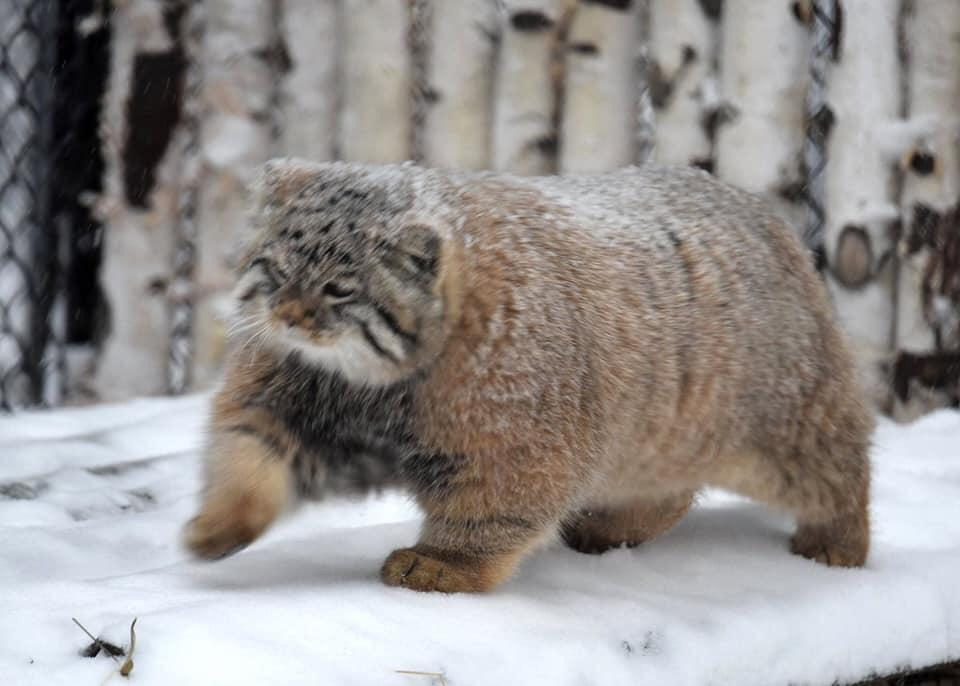

In [17]:
# 使用本地图片（熊猫）
preds = classifier(
    "data/image/panda.jpg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.9962, 'label': 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'}
{'score': 0.0018, 'label': 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens'}
{'score': 0.0002, 'label': 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus'}
{'score': 0.0001, 'label': 'sloth bear, Melursus ursinus, Ursus ursinus'}
{'score': 0.0001, 'label': 'brown bear, bruin, Ursus arctos'}


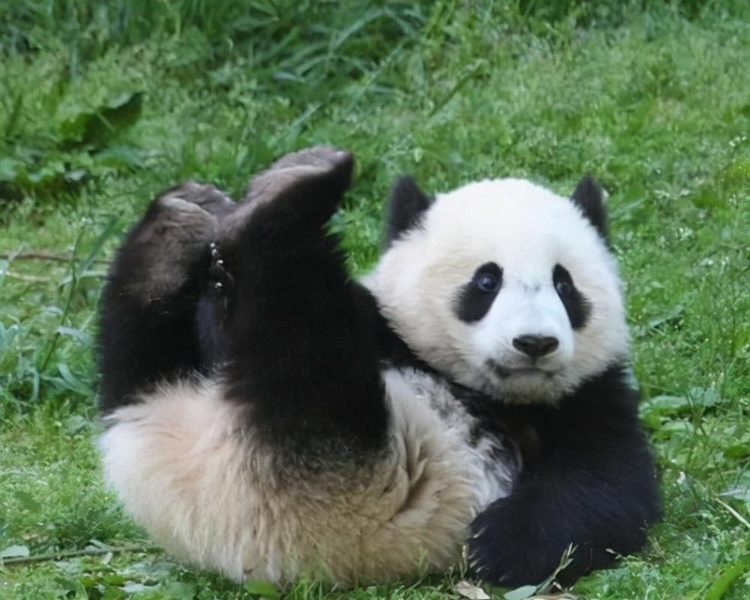

### Object Detection
与图像分类不同，目标检测在图像中识别多个对象以及这些对象在图像中的位置（由边界框定义）。目标检测的一些示例应用包括：

自动驾驶车辆：检测日常交通对象，如其他车辆、行人和红绿灯
遥感：灾害监测、城市规划和天气预报
缺陷检测：检测建筑物中的裂缝或结构损坏，以及制造业产品缺陷

In [18]:
from transformers import pipeline

detector = pipeline(task="object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

/root/miniconda3/envs/transformers/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [19]:
preds = detector(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

[{'score': 0.9865,
  'label': 'cat',
  'box': {'xmin': 178, 'ymin': 154, 'xmax': 882, 'ymax': 598}}]